# Pràctica 7: Clustering

#### NOM: Miquel Monge Dalmau


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Toy Data (40%)
* B. Fashion MNIST (30%)
* C. Color Image (30%)

## Introducció

És difícil de valorar si el clustering és "correcte" o si existeix un patró subjacent a les dades que permeti objectivament decidir el grau de certesa de l'agrupació. Pot ser útil per analizar, agrupar i treure informació de com són les dades, però la qualitat de la partició dependrá de l'aplicació i del analista.

S'acostuma a aplicar a dades de forma no supervisada, és a dir, quan no es tenen etiquetes anotades. En aquest cas, no es rep cap feeback d'error o de recompensa en el cas de fer-ho bé. L'aprenentatge no supervisat conté aquells algoritmes que aprenen sense exemple etiquetats, utilitzant les caracteristiques de les entreades per categoritzar of extreure informació segons algún tipus de criteri **geometric** o **estadistic**.

Els diferents tipus de problemes no supervisats, podriem veure'ls a continuació (no són els únics):

+ *Clustering:* dividir els exemples en diferents agrupacions.
+ *Dimensionality reduction:* reduir els atributs/caracteristiques de les dades (principal component analysis, independent component analysis, non-negative matrix factorization.)
+ *Outlier detection:* trobar events inusuals (per exemple, errors, mals funcionaments..).
+ *Novelty detection:* trobar canvis en les dades.

Un dels més utilitzats és el clustering.



## Clustering

El que volem fer és particionar els exemples no etiquetats en conjunts de clusters, de tal manera que:
- Els exemples dins d'un cluster siguin similars (*alta intra-class* similitut)
- Els exemples de diferents clusters siguin diferents (*baixa inter-class* similitut)

Possibles preguntes que ens agradaria poder respondre sobre el clustering.

+ Que és un  *agrupament natural* en les dades específiques a tractar? 
    + Definició d'"agrupabilitat"  (groupness)
    + Definició de  "similaritat/distancia"

+ *Com agrupar* mostres?


+ *Quants* clusters?
    + Fixats a priori?
    + Completament *data driven*?
    + Evitar clusters “trivials” - massa grans o petits ...
    + Quins mètodes funcionen millor quan el numero de mostres és molt gran?
    + Quins mètodes funcionen millor quan el numerop de classes és molt gran?, etc.


+ *Que* és un *bon agrupament*? 
    + Quines mesures objectives es poden usar per avaluar la clualitat dels clusters?


+ En quin espai es millor *agrupar*? 
    + Que fer en un espai de característiques d´alta dimensionalitat?



## Datasets

#### A. Toy Data

Farem ús de diferents generadors d'exemples, per tal de veure els resultats dels diferents algorismes:
- sklearn.datasets.make_blobs
- sklearn.datasets.make_moons
- sklearn.datasets.make_circles


#### B. Fashion MNIST
Us podeu *descarregar* la Fashion MNIST (si es que no la teniu) del link de [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv). Son uns 150MB una vegada descomprimits.

#### C. Color Quantization Image

Podeu escollir 2 imatges que volgueu vosaltres.


## A. Toy Data (40%)

### Respostes

### 1. Toy datasets

#### Preguntes

1. Crea els teus datasets de joguina. En total en tindreu 4 d'independents, que fareu servir a la resta del apartat. Creeu entre 2-7 clusters per la distribució de blobs, modifiqueu el noise. Feu ús de les següents funcions:
 - [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
 - [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)
 - [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
 - un dataset on hi hagi dades aleatoriament per tot l'espai (ja fet)
 
 &emsp; &emsp;**Mostreu** els 4 datasets de joguina creats en una mateixa figura fent servir subplots.

In [1]:
# Marquem una llavor global per a totes les execucions
random_seed = 0

In [2]:
import numpy as np
import sklearn
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def plot_data(X, y, Xtest=None, ytest=None):
    if X is None or y is None:
        return
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Accent')
    lim = plt.axis()
    if Xtest is not None:
        plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, s=20, cmap='Accent', alpha=0.3)
        plt.axis(lim)

def get_data(tipus_dades, n = 1000, noise = 0.01, rs = 0):
    X, y = None, None
    if tipus_dades == "blob":
        X, y = make_blobs(n_samples = n, n_features = 2, random_state = rs, centers = 2)
        X = MinMaxScaler((-1,2)).fit_transform(X)

    elif tipus_dades == "moons":
        X, y = make_moons(n_samples = n, noise = noise, random_state = rs, shuffle = True)

    elif tipus_dades == "circles":
        X, y = make_circles(n_samples = n, random_state = rs, shuffle = True, factor = .5, noise = noise)
    
    elif tipus_dades == "combined":
        X, y = make_blobs(n_samples = n, centers = 2, n_features = 2, random_state = rs)
        X = MinMaxScaler((-1,2)).fit_transform(X)
        Xt, yt = make_moons(n_samples = n, shuffle = True, noise = noise, random_state = rs)
        X = np.vstack([X, Xt])
        y = np.hstack([y, yt + len(np.unique(y))])
        Xt, yt = make_circles(n_samples = n, shuffle = True, noise = noise, random_state = rs, factor = .5)
        X = np.vstack([X, Xt])
        y = np.hstack([y, yt + len(np.unique(y))])
        permutation = np.random.permutation(X.shape[0])
        y[permutation] = y
        X[permutation, :] = X

    elif tipus_dades == "full":
        rng = np.random.RandomState(rs)
        X = rng.rand(n, 2)
        y = np.ones((X.shape[0]))*-1
        X = sklearn.preprocessing.MinMaxScaler((-1, 2)).fit_transform(X)
    else:
        raise "Toy data not recognized"

    return X, y

(1000, 2)


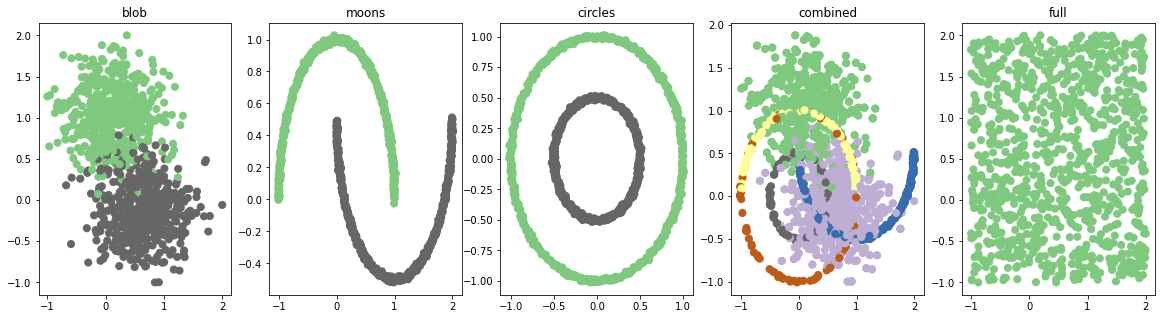

In [3]:
datasets = ['blob', 'moons', 'circles', 'combined', 'full']

plt.figure(figsize=(20,len(datasets)))
for i,d in enumerate(datasets):
    plt.subplot(1, len(datasets), i+1)
    plt.title(f"{d}")
    X,y = get_data(d)
    plot_data(X, y)

        
print(X.shape)

### 2. Comparar Models

2. Feu una comparativa dels resultats obtinguts amb diferents clusteritzadors. Com està explicat a teoria, n'hi ha de molts tipus:

  <img src="https://static-01.hindawi.com/articles/jat/volume-2019/1628417/figures/1628417.fig.001.svgz" width="600">

&emsp; &emsp;  Feu proves sobre els 4 datasets anteriors amb els [següents metodes](https://scikit-learn.org/stable/modules/clustering.html):
 - [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
 - [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)
 - [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
 - [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) (single, complete, Ward i average linkage)
 - [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
 
  &emsp; &emsp; Intenteu optimitzar una bona visualització per cada una amb els parametres utilitzats. L'objectiu es mostrar els resultats en una mateixa gràfica, com en aquest [exemple](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html). <u>Mostreu exemples que demostrin que enteneu què fan els parametres dels diferents algoritmes</u>.


In [4]:
def experiment(dataset_name, model):
    print("Running experiment: {} {}".format(dataset_name, model))
    X, y = get_data(dataset_name)

    if X is None or y is None:
        return -1

    model.fit(X, y)
    
    plot_data(X, model.labels_)

Running experiment: blob KMeans(n_clusters=3)
Running experiment: moons KMeans(n_clusters=3)
Running experiment: circles KMeans(n_clusters=3)
Running experiment: combined KMeans(n_clusters=3)
Running experiment: full KMeans(n_clusters=3)
Running experiment: blob MeanShift(max_iter=10)
Running experiment: moons MeanShift(max_iter=10)
Running experiment: circles MeanShift(max_iter=10)
Running experiment: combined MeanShift(max_iter=10)
Running experiment: full MeanShift(max_iter=10)
Running experiment: blob SpectralClustering()
Running experiment: moons SpectralClustering()
Running experiment: circles SpectralClustering()
Running experiment: combined SpectralClustering()
Running experiment: full SpectralClustering()
Running experiment: blob AgglomerativeClustering()
Running experiment: moons AgglomerativeClustering()
Running experiment: circles AgglomerativeClustering()
Running experiment: combined AgglomerativeClustering()
Running experiment: full AgglomerativeClustering()
Running exper

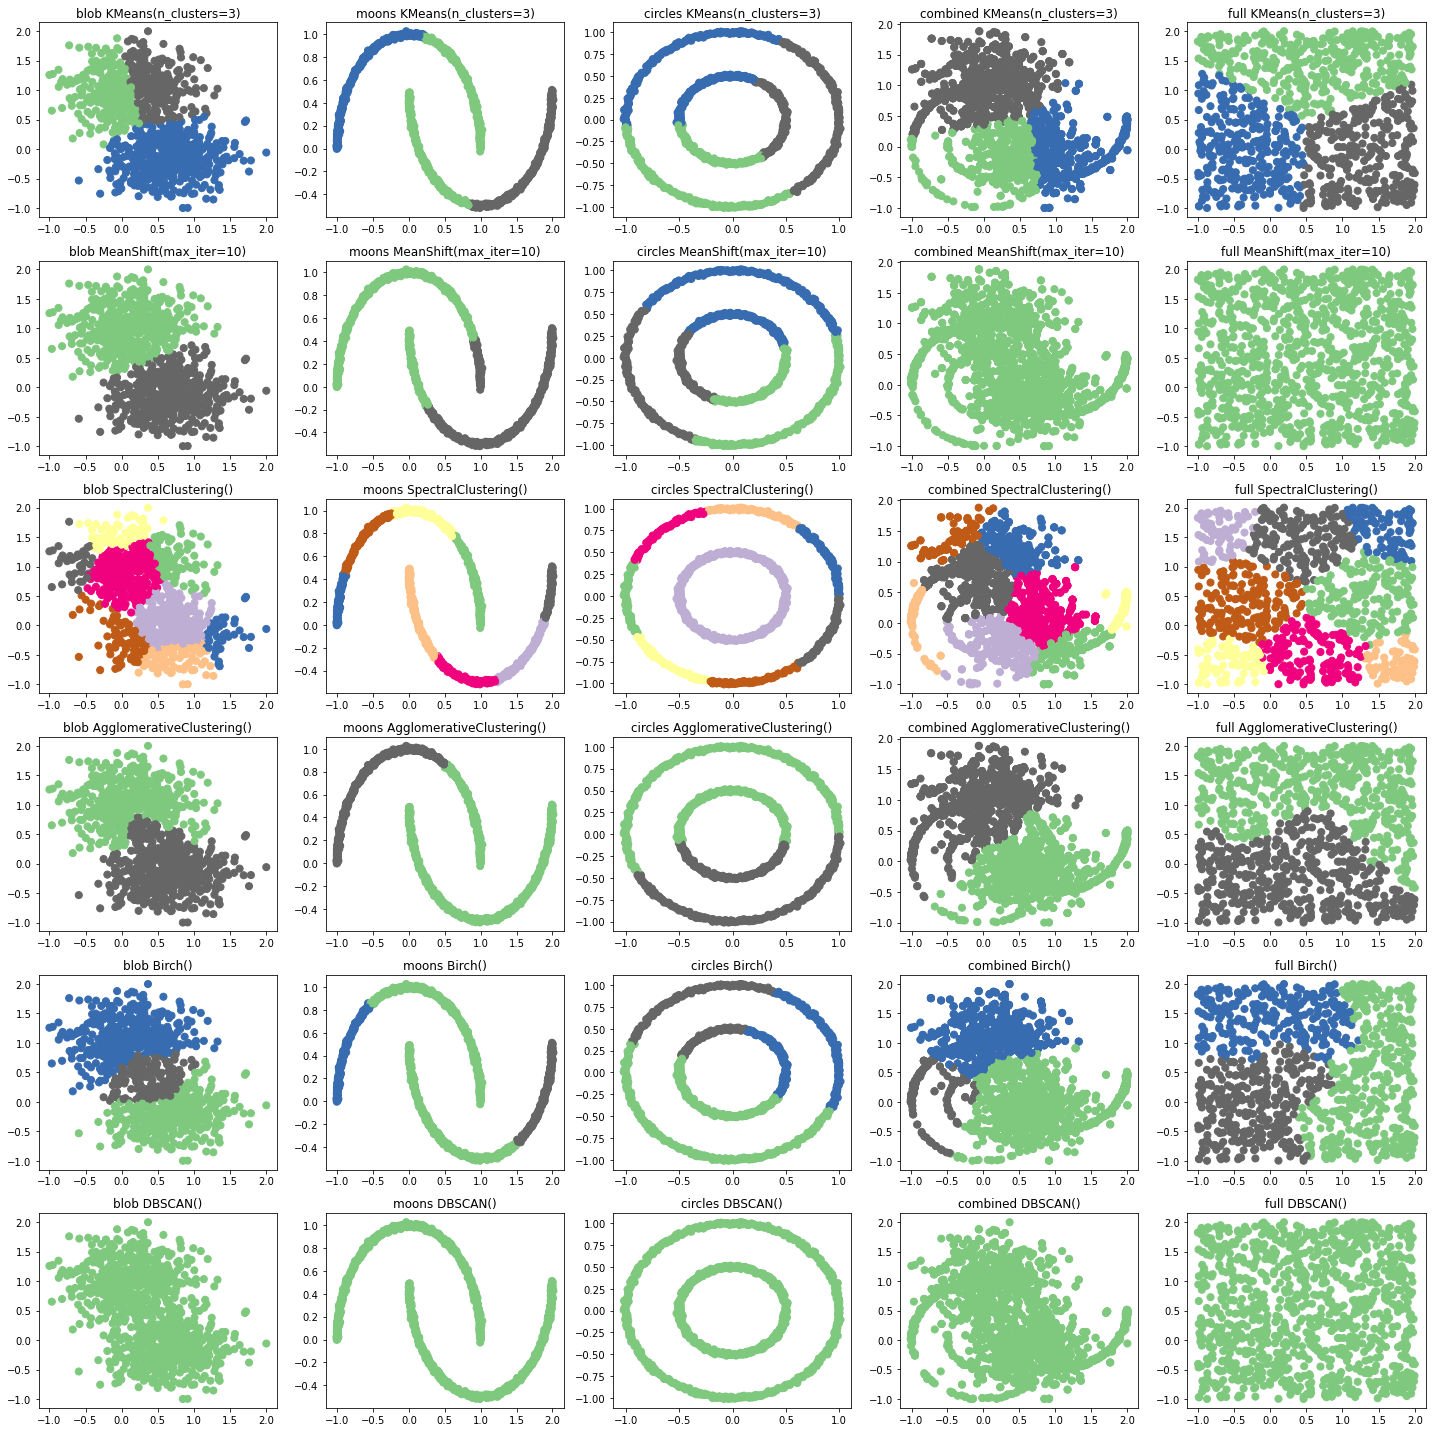

In [7]:
from sklearn.cluster import KMeans, MeanShift, SpectralClustering, AgglomerativeClustering, Birch, DBSCAN

metodes = [KMeans(n_clusters = 3), MeanShift(max_iter=10), SpectralClustering(), AgglomerativeClustering(), Birch(), DBSCAN()]

aux = 0
plt.figure(figsize=(20,20))
for metode in metodes:
    for dataset in datasets:
        aux += 1
        plt.tight_layout()
        plt.subplot(len(metodes), len(datasets), aux)
        plt.title("{} {}".format(dataset, metode))
        experiment(dataset, metode)

plt.show()

### 3. Avaluar models

3. Utilitza els seguents mètodes per intentar **seleccionar el número de clusters òptims** per a k-means
 - [Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) [(o una altra visualització)](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)
 - [Elbow Method](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6)
[(o una altra visualització)](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

('blob', 2, 272.60471766472455, 0.5212667061681159)
('moons', 2, 398.81456541309467, 0.49229855525813976)
('circles', 2, 396.8750183758065, 0.35441515639201526)
('combined', 2, 1182.3670491983473, 0.46435604767280303)
('full', 2, 962.2961736250822, 0.36399244217078885)
('blob', 3, 215.16365767177544, 0.41908227099600154)
('moons', 3, 266.58076099641374, 0.4333381428794698)
('circles', 3, 240.17315044871376, 0.3908269612918667)
('combined', 3, 858.5232886082006, 0.40214773089895484)
('full', 3, 596.2724646018147, 0.3950267108359889)
('blob', 4, 162.801553758324, 0.3454470233766107)
('moons', 4, 171.89154371531683, 0.46702868437815753)
('circles', 4, 168.91397784692538, 0.38084460229107187)
('combined', 4, 636.6177576608923, 0.3713002580777857)
('full', 4, 376.67916195274427, 0.4192889821119184)
('blob', 5, 134.41737858328128, 0.3513901018800877)
('moons', 5, 129.00970438704246, 0.49810489531584295)
('circles', 5, 132.72021103404595, 0.36067163949085795)
('combined', 5, 525.2930684074939

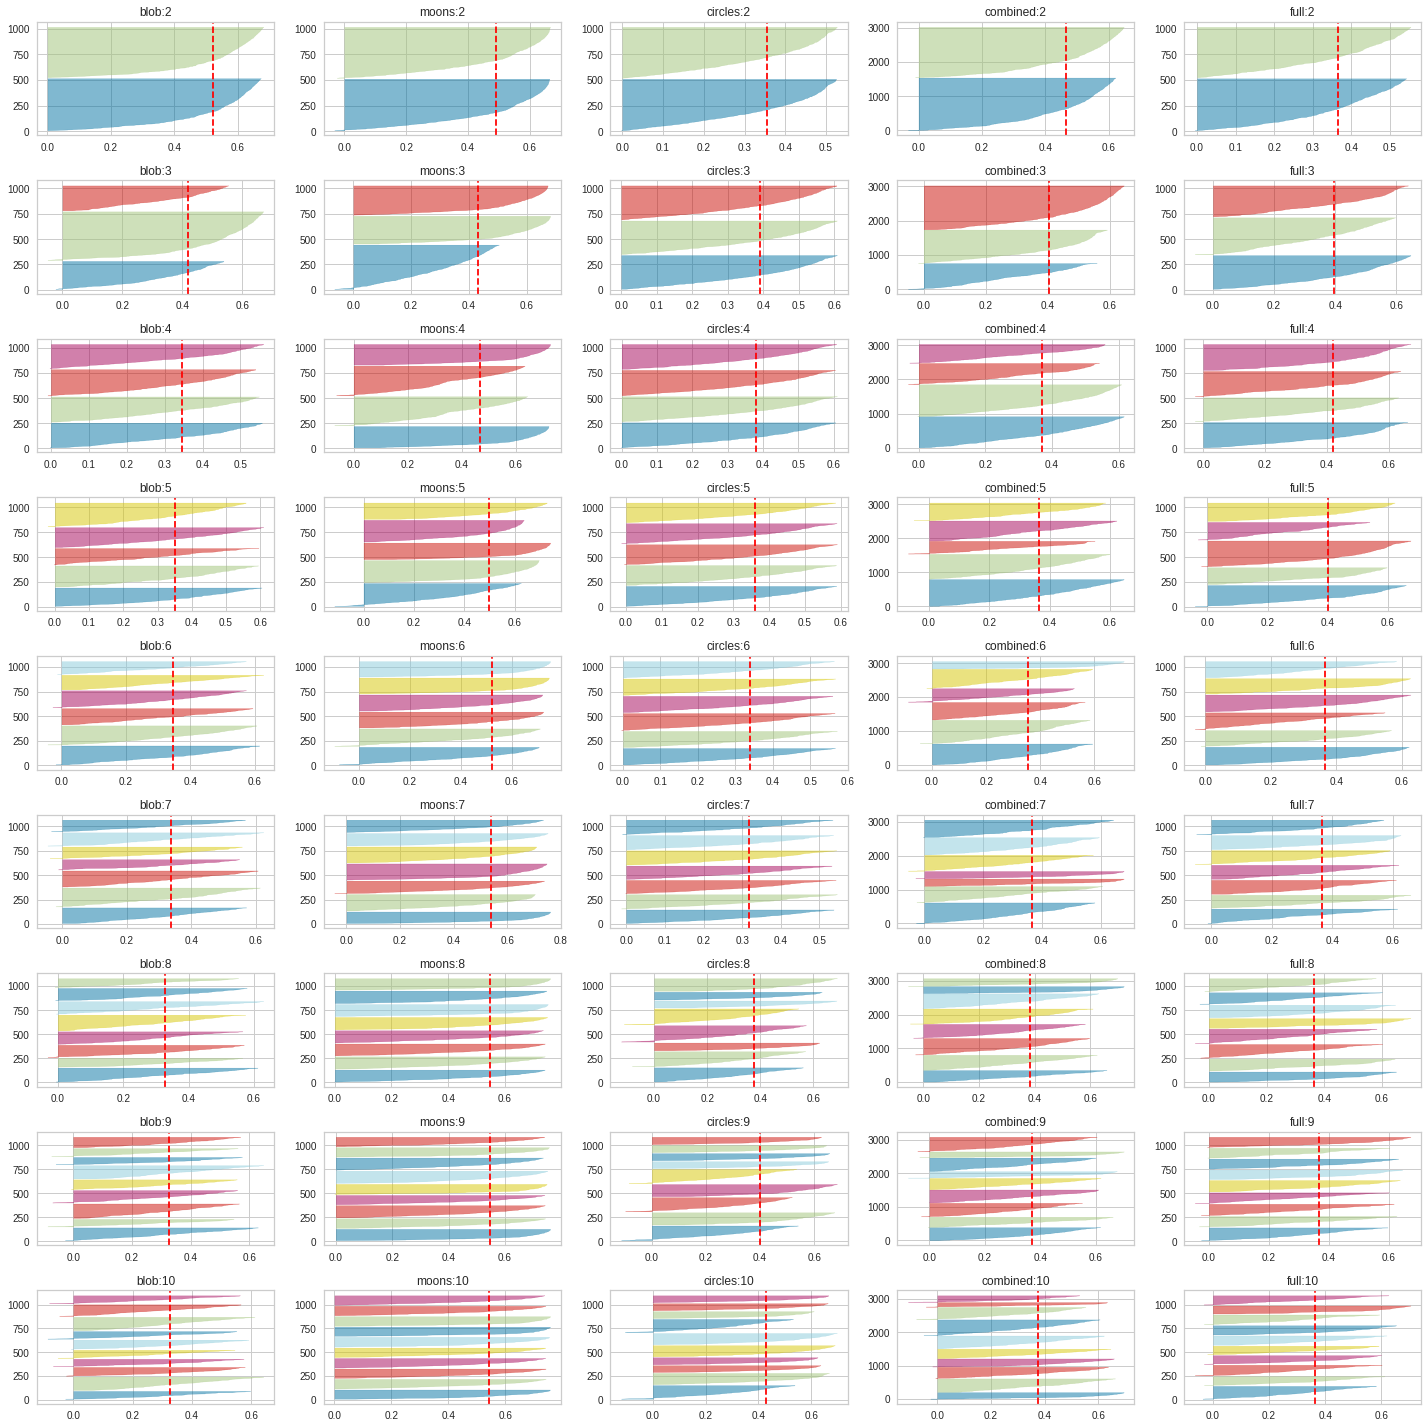

In [8]:
# Silhouette analysis
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize = (20,20))
results = []
i = 0
k_tries = range(2, 11)
for k in k_tries:
    for dataset in datasets:
        i += 1
        plt.tight_layout()
        plt.subplot(len(k_tries), len(datasets), i)
        plt.title(f"{dataset}:{k}")
        model = KMeans(random_state = random_seed, n_clusters = k)
        visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')

        X, y = get_data(dataset)
        visualizer.fit(X)
        results.append((dataset, k, model.inertia_, visualizer.silhouette_score_))
        print(results[-1])

Podem veure els resultats tant de forma gràfica com a la llista que es mostra per pantalla. Per posar un exemple, analitzem el dataset **blob** i el **circles**. Pel primer veiem que el millor *silhouette_score_* (0.52) s'obté amb el mínim nombre de clusters pel k_means, és a dir 2. En canvi, pel dataset circles veiem que la millor puntuació és amb k = 10, tot i que amb k = 9 o 3 també obtenim bons resultats.

Dataset: blob


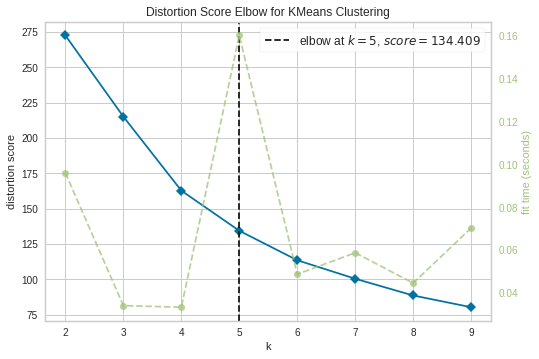

Dataset: moons


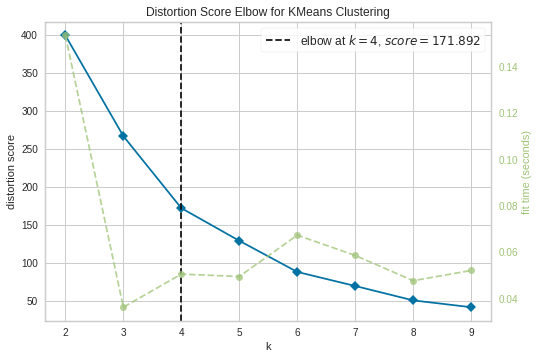

Dataset: circles


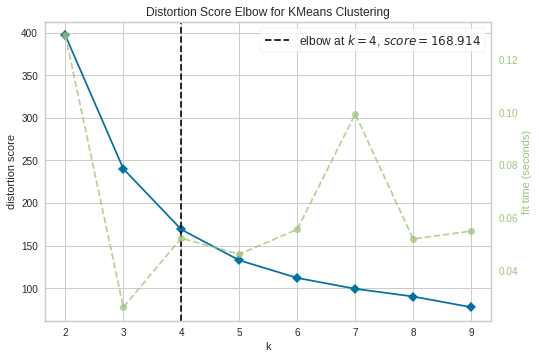

Dataset: combined


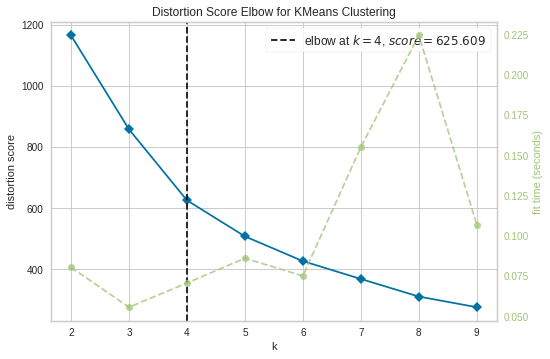

Dataset: full


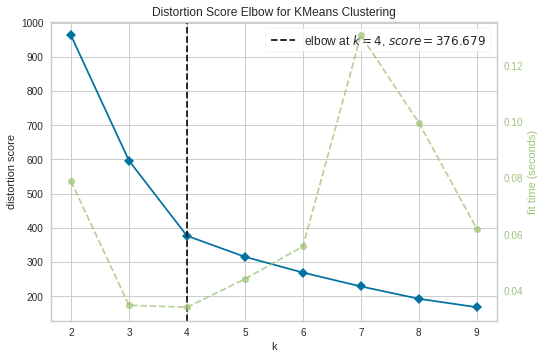

In [9]:
# Elbow method
from yellowbrick.cluster.elbow import kelbow_visualizer

for i in datasets:
    X,y = get_data(i)
    print(f"Dataset: {i}")
    kelbow_visualizer(KMeans(random_state = random_seed), X, k=(2,10))

Amb aquest mètode també provem un rang de possibles valors pel número de clusters del model K_means, en aqust cas, veiem de forma gràfica que per a tots els datasets el valor òptim de k és 4, menys al dataset blob, que el millor score s'aconsegueix amb k = 5. Notem que obtenim resultats diferents respecte a l'altra anàlisi.

## B. Fashion MNIST (30%)

En aquest apartat, farem servir una bases de dades de imatges, per a fer-hi un clustering. Esta anotada manualment per a fer una classificació, pero no utilitzarem aquesta informació per clusteritzar o trobar-ne el número de clusters desitjats. Us deixo un parell de funcions per mostrar gràficament els clusters obtinguts. Link al dataset [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv).

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_mnist_clusters(clusters, cmap='binary'):
    
    n_clusters = clusters.shape[0]
    
    nx = int(np.ceil(np.sqrt(n_clusters)))
    ny = int(np.ceil(n_clusters / nx))

    plt.figure(figsize=(20,10))
    
    for i in range(n_clusters):
        plt.subplot(nx,ny,i+1)
        plt.imshow(clusters[i,:].reshape(28,28), cmap=cmap)
        plt.axis('off')
    
    plt.show()
    
import seaborn as sns

def mostrar_tsne(X_embedded, true_labels, cluster_labels):
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=true_labels,
                    legend=False, alpha=0.5,
                    palette=sns.color_palette('viridis', n_colors=len(np.unique(true_labels))))
    plt.title("True Label")

    plt.subplot(122)
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=cluster_labels,
                    legend=False, alpha=0.5,
                    palette=sns.color_palette('magma', n_colors=len(np.unique(cluster_labels))))
    plt.title("Clusters")
    
def reordena_clusters_segons_y(y, cluster_centers_, cluster_labels):

    n_clusters = cluster_centers_.shape[0]
    cluster_to_y = []
    for i in range(n_clusters):
        cluster_to_y.append(np.argmax(np.bincount(y[cluster_labels == i])))

    idx_clusters = np.argsort(cluster_to_y)
    reordered_cluster_centers = cluster_centers_[idx_clusters]

    reordered_labels = np.zeros_like(cluster_labels)
    for i in range(n_clusters):
        reordered_labels[cluster_labels==idx_clusters[i]] = i

    return reordered_cluster_centers, reordered_labels

#### Preguntes

1. Un cop carregades les dades del fashion-mnist-train, feu un sampling de les dades si us triga massa (agafeu com unes 1000 mostres i guardeu-ho separat del original).


In [11]:
import pandas as pd 

# Dataset
dataset_mnist = pd.read_csv('fashion-mnist_train.csv')
Y_train_mnist = dataset_mnist["label"]
X_train_mnist = dataset_mnist.drop("label", axis="columns")

# Sampling
Y_train_sample = Y_train_mnist[:1000]
X_train_sample = X_train_mnist[:1000]

2. Feu una clusterització de les dades. A través del mètode [**Elbow**](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) busqueu la millor K en el K-Means.

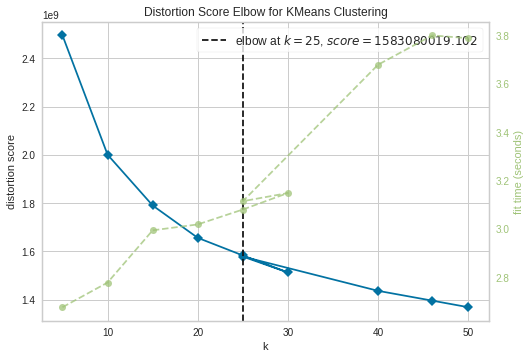

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (5, 10, 15, 20, 25, 30, 25, 40, 46, 50))

visualizer.fit(X_train_sample)
visualizer.show()


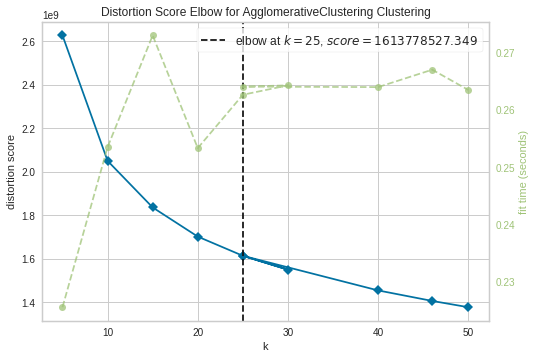

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k = (5, 10, 15, 20, 25, 30, 25, 40, 46, 50))

visualizer.fit(X_train_sample)
visualizer.show()

Veiem gràficament que la millor k pel clusteritzat és k = 25, pels dos models.

In [14]:
best_k = 25

3. Executa **k-Means** amb el millor k trobat. Fes-ho amb les dades samplejades i sense samplejar (pot trigar maxim 5 min).

In [15]:
# Sample
kmeans_sample = KMeans(random_state = random_seed, n_clusters = best_k).fit(X_train_sample)

In [16]:
# Mnist
kmeans_mnist = KMeans(random_state = random_seed, n_clusters = best_k).fit(X_train_mnist)

4. Mostra els centres del k-Means trobats. Us he deixat la funcion `visualize_mnist_clusters`. Què representen els centres? Quina diferencia hi trobes amb les dades samplejades i sense samplejar? Per tal de facilitar la comparació, us he deixat la funció `reordena_clusters_segons_y` que reordena l'etiqueta dels labels segons la y real. 

Sample:


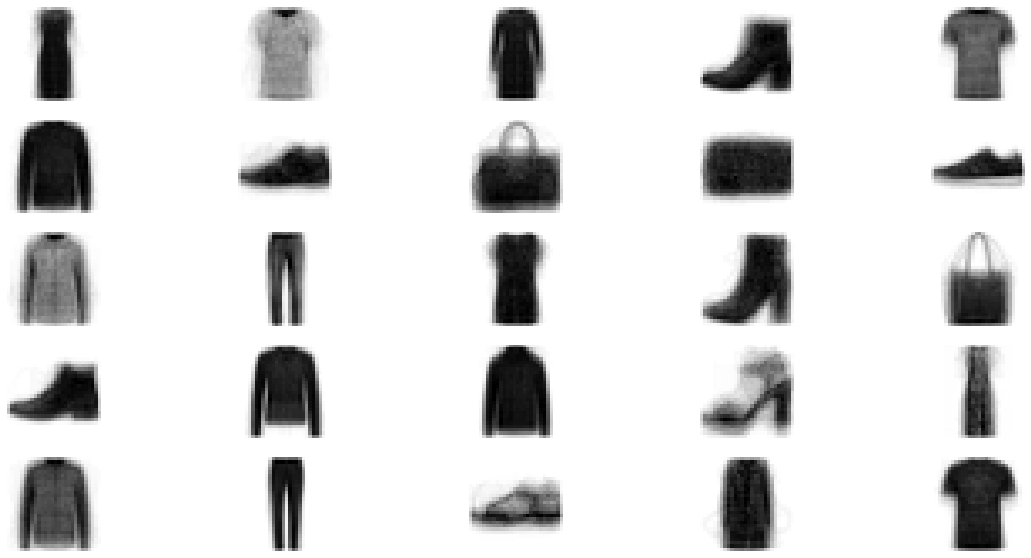

Mnist:


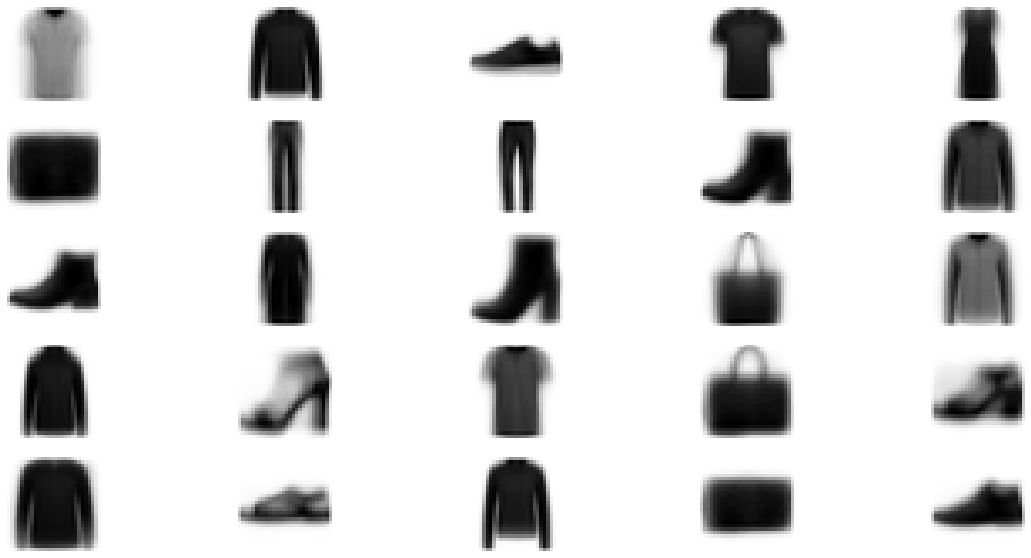

In [17]:
print('Sample:')
visualize_mnist_clusters(kmeans_sample.cluster_centers_)

print('Mnist:')
visualize_mnist_clusters(kmeans_mnist.cluster_centers_)

Ordenem segons label per poder fer una millor anàlisi i extreure conclusions.

In [18]:
# Sample
reordered_cluster_centers_sampled, reordered_labels_sampled = reordena_clusters_segons_y(Y_train_sample, 
                                                                                        kmeans_sample.cluster_centers_, 
                                                                                        kmeans_sample.labels_)

# Mnist
reordered_cluster_centers, reordered_labels = reordena_clusters_segons_y(Y_train_mnist, 
                                                                        kmeans_mnist.cluster_centers_, 
                                                                        kmeans_mnist.labels_)


Sample:


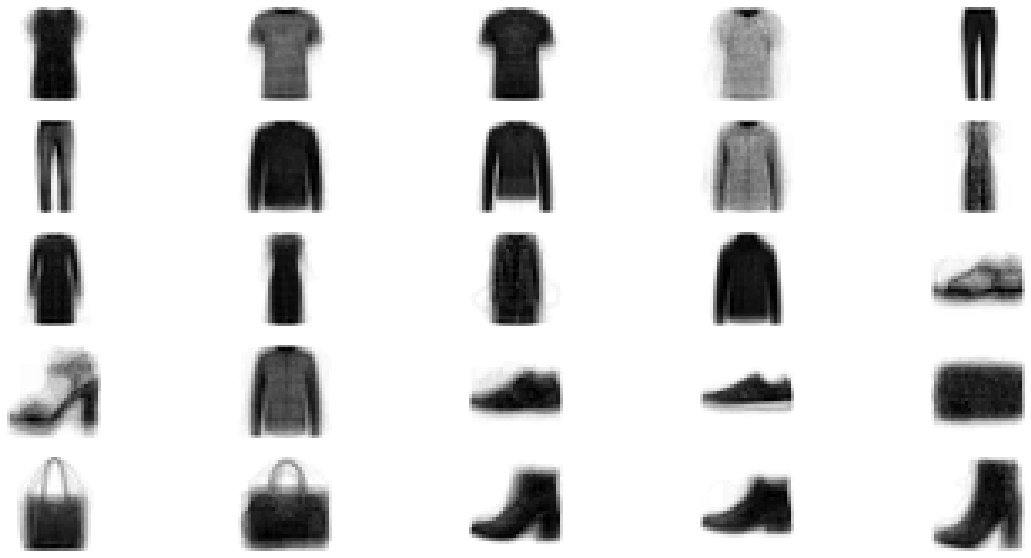

In [19]:
print('Sample:')
visualize_mnist_clusters(reordered_cluster_centers_sampled)

Mnist:


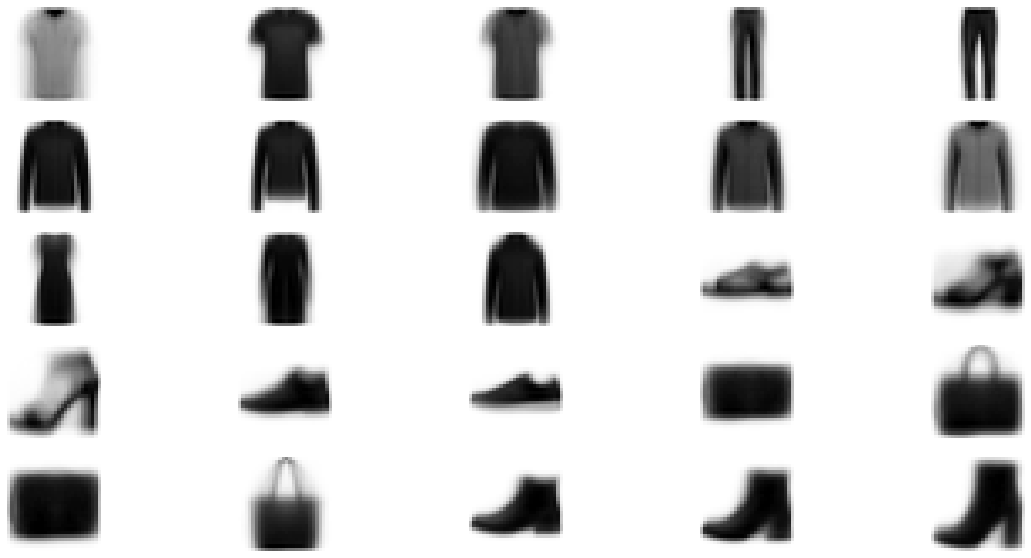

In [20]:
print('Mnist:')
visualize_mnist_clusters(reordered_cluster_centers)

Notem diverses coses. En primer lloc veiem que no s'estan mostrant totes les etiquetes que hi ha dins de la BBDD, en la gràfica superior a penes veiem 4 o 5 labels (pantalons, sabates, tacons, samarretes, etc.). Això ens diu que poden haver-hi etiquetes/labels/categories que no s'estiguin tenint en compte, segurament perquè no tinguem suficients dades/mostres d'aquestes.

En segon lloc notem que no totes les etiquetes apareixen amb la mateixa freqüència, en aquest cas, veiem moltes més sabates que bosses, que tan sols veiem dos, això pot indicar poca variabilitat de les dades.

5. Aplica una transformació [`TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) sobre el conjunt de dades (millor el samplejat, sino pot trigar força..) i visualitza els labels en aquest espai de poques dimensions. També us he deixat la funció `mostrar_tsne`, pero podeu fer la vostra propia. Veureu que el sampling utilitzat influeix força amb la visualització.

/home/mdalm/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


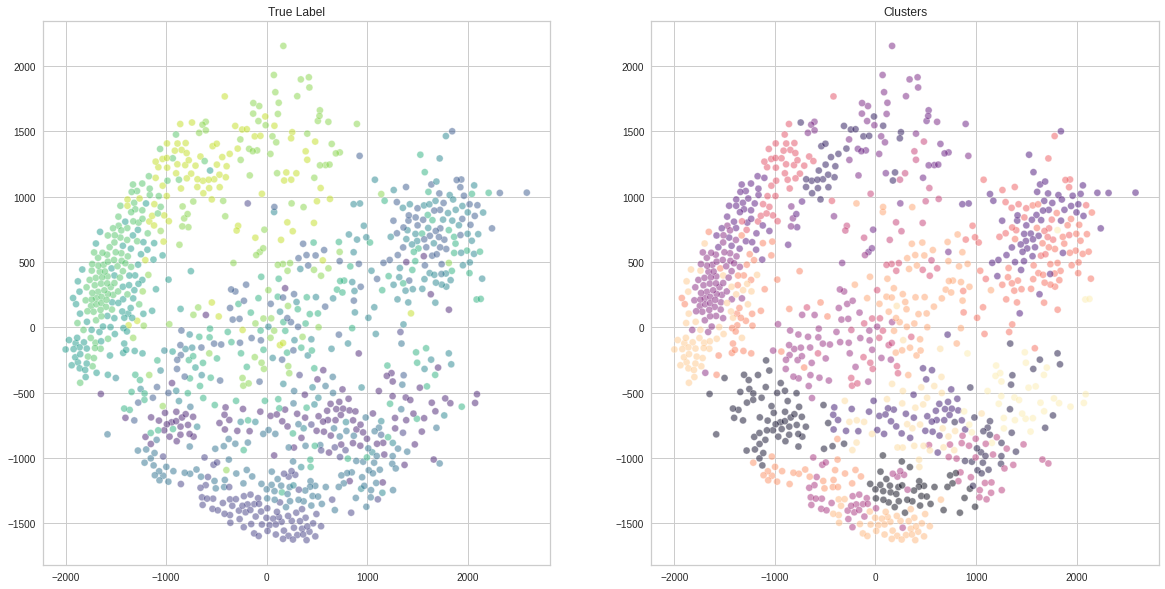

In [21]:
from sklearn.manifold import TSNE

X_embedded_sample = TSNE(init='pca', learning_rate='auto',n_components = 2).fit_transform(X_train_sample)
mostrar_tsne(X_embedded_sample, Y_train_sample, kmeans_sample.labels_)

### C. Color Quantization Image (30%)

### Preguntes

1. Escull 2 imatges, propies o de internet, mostreu-les i visualitzeu els colors en una gràfica 3d. A continuació veureu un exemple del que volem (a i b):

<table>
<tr>
    <td>
        <img src="https://miro.medium.com/max/1400/1*je8F8y5Vr9Mg44WEAG0YCg.jpeg" width="300">
    </td>
    <td>
        <img src="https://miro.medium.com/max/2892/1*94LY1FnsLN4L33dho9ol-A.png" style="width: 300px; height:200px;">
    </td>
    <td>
        <img src="https://miro.medium.com/max/1400/1*TIhj90vgn0lzgv6MsT7HNw.png" style="width: 300px; height:200px;">
    </td>
    
</tr>
<tr>
    <td style="text-align:center">
        (a) imatge original
    </td>
    <td style="text-align:center">
        (b) representació de tots els colors de la imatge
    </td>
    <td style="text-align:center">
        (c) quantització dels colors
    </td>
    
</tr>
</table>

In [22]:
import time
import numpy as np
import skimage.io
from sklearn.utils import shuffle
from skimage.transform import downscale_local_mean
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
    
def llegir_imatge(image_name):
    img = skimage.io.imread(image_name)
    # Convert to floats instead of the default 8 bits integer coding. Dividing by
    # 255 is important so that plt.imshow behaves works well on float data (need to
    # be in the range [0-1])
    img = np.array(img, dtype=np.float64) / 255
    print(img.shape)
    return img

def mostra_imatge(img):
    plt.figure()
    plt.axis('off')
    plt.imshow(img)
    
def mostra_distribucio_colors(img, pixel_colors=None):
    real_pixel_colors = img.reshape(-1,3)
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(img[:,:,0].flatten(), 
               img[:,:,1].flatten(), 
               img[:,:,2].flatten(), facecolors=real_pixel_colors, marker="o")
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.set_title('All Distinct Colors ({} colors)'.format(len(np.unique(real_pixel_colors))))
    
    if pixel_colors is not None:
        ax = fig.add_subplot(122, projection='3d')
        ax.scatter(img[:,:,0].flatten(), 
                   img[:,:,1].flatten(), 
                   img[:,:,2].flatten(), facecolors=pixel_colors, marker="o")
        ax.set_xlabel("Red")
        ax.set_ylabel("Green")
        ax.set_zlabel("Blue")
        ax.set_title('Clustered Distinct Colors ({} colors)'.format(len(np.unique(pixel_colors))))

    plt.show()
    
def samplejar_colors_imatge(img):
    image_array = img.reshape(-1, 3)
    image_array_sample = shuffle(image_array, random_state=0)[:10000]
    return image_array, image_array_sample

def recrear_colors(codebook, labels, shape=None):
    colors_array = np.zeros((len(labels), 3))
    for l in np.unique(labels):
        colors_array[labels==l] = codebook[l,:]

    return colors_array if shape is None else colors_array.reshape(shape)

    
def recrear_image(codebook, labels, shape):
    d = codebook.shape[1]
    image = np.zeros(shape)
    label_idx = 0
    for i in range(shape[0]):
        for j in range(shape[1]):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image



In [23]:
# Llegim les dues imatges que hem seleccionat

img_world = llegir_imatge("paisaje.jpg")
img_dog = llegir_imatge("dog.jpg")

(853, 1280, 3)
(554, 840, 3)


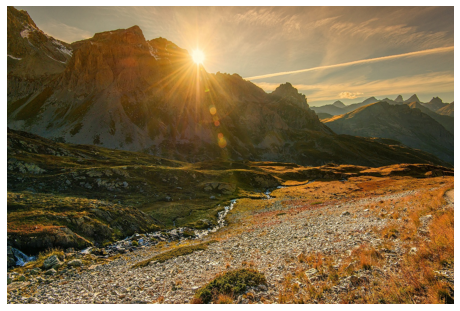

In [24]:
mostra_imatge(img_world)

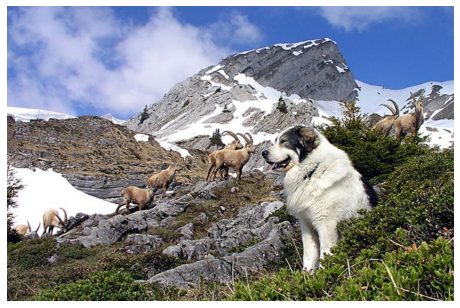

In [25]:
mostra_imatge(img_dog)

In [26]:
from sklearn.mixture import GaussianMixture as GMM

def processa_imatge(img, model, n_colors = 16):
    clusters = None
    labels = None
    t0 = time.time()
    print("Fitting model {} on a small sub-sample of the data".format(model))

    # fer sampling imatge per no trigar gaire..
    image_array, image_array_sample = samplejar_colors_imatge(img)
    
    if model=="K-means":
        # fit del model
        kmeans = KMeans(n_clusters = n_colors, random_state=42).fit(image_array_sample)
        # prediccio del model sobre tots els pixels de la imatge (omplir variable labels)
        labels = kmeans.predict(image_array.reshape(-1, 3))
        # agafar els clusters segons si es k-means o gmm (estan en atributs diferents)
        clusters = kmeans.cluster_centers_

    elif model=="GMM":
        gmm_img_sample = GMM(n_components = n_colors)
        labels = gmm_img_sample.fit_predict(image_array)
        clusters = gmm_img_sample.means_
    else:
        return -1
        
    print("done in %0.3fs." % (time.time() - t0))
        
    return clusters, labels

In [27]:
n_colors = 16
model = "K-means"

clusters_world, labels_world = processa_imatge(img_world, model)

Fitting model K-means on a small sub-sample of the data
done in 3.232s.


In [28]:
clusters_dog, labels_dog = processa_imatge(img_dog, model)

Fitting model K-means on a small sub-sample of the data
done in 2.935s.


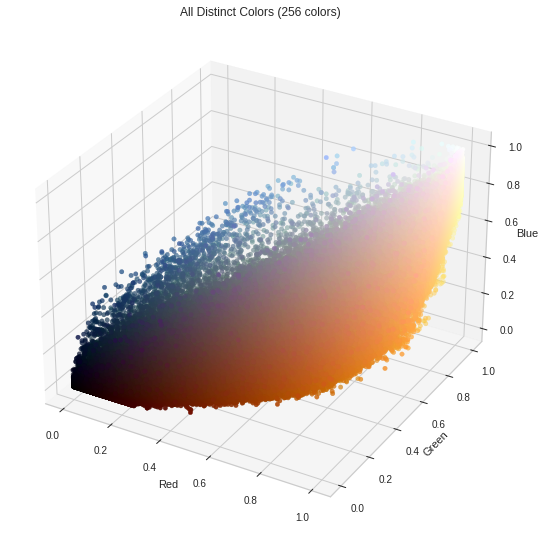

In [29]:
mostra_distribucio_colors(img_world)

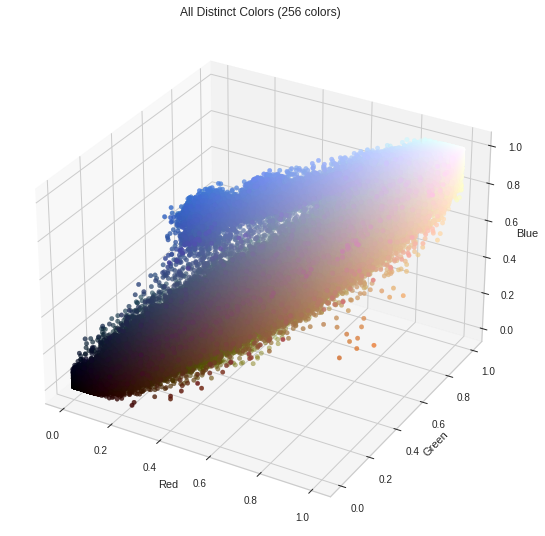

In [30]:
mostra_distribucio_colors(img_dog)

2. Realitzeu el clustering de colors, per tal de coneixer aquells "colors" més representatius de la imatge. Podeu aplicar un **k-Means** amb 16 clusters. Mostreu la representació dels colors quantitzats (com la c). Podeu agilitzar el procés fent un sampling del total de pixel de la imatge.

In [31]:
# Imatge paisatje
colors_world = recrear_colors(clusters_world, labels_world)
colors_im_world = recrear_image(clusters_world, labels_world, img_world.shape)

# Imatge gos
colors_dog = recrear_colors(clusters_dog, labels_dog)
colors_im_dog = recrear_image(clusters_dog, labels_dog, img_dog.shape)

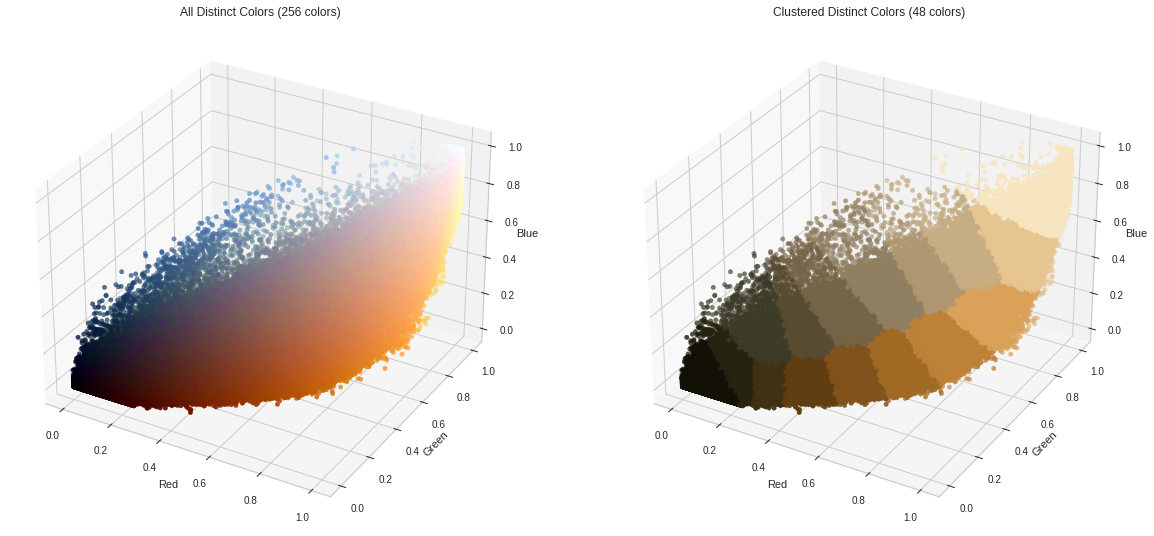

In [32]:
mostra_distribucio_colors(img_world, colors_world)

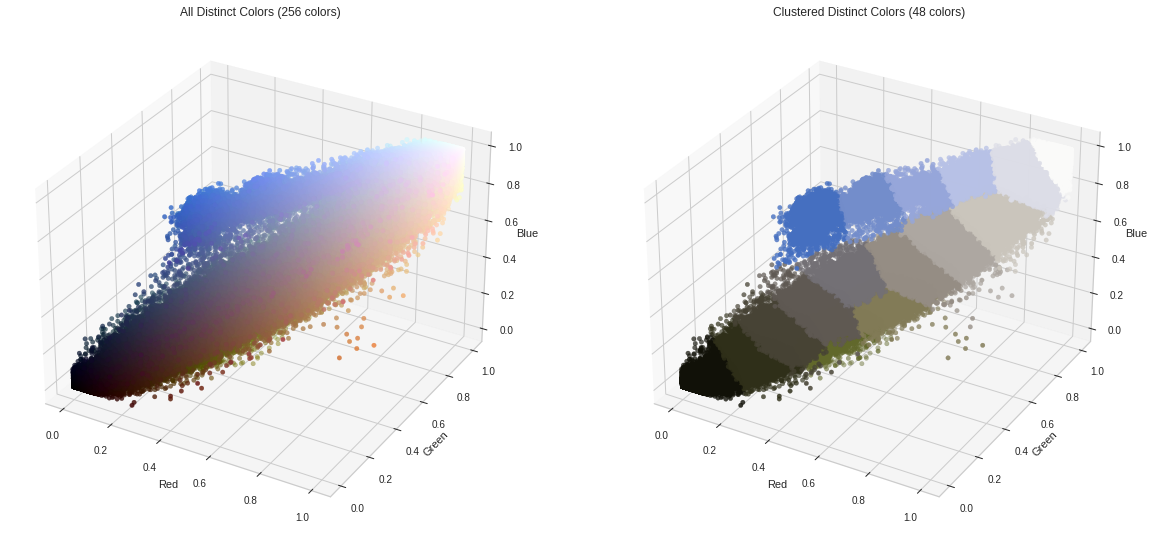

In [33]:
mostra_distribucio_colors(img_dog, colors_dog)


3. Mostreu la comparativa de la imatge original i la imatge representada només amb els 16 colors. [Aqui trobareu un exemple similar](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html). Un exemple amb diferents seleccions de k:
    <img src="https://miro.medium.com/max/1400/1*7ioAN_1cNsDRC76HGBZEyQ.png" width="100%">

In [37]:
def comparacio_imatges(fotos):
    plt.figure(figsize=(40,40))
    aux=1
    for i in fotos:
        plt.subplot(len(metodes), len(datasets), aux)
        plt.axis('off')
        plt.imshow(i)
        aux+=1

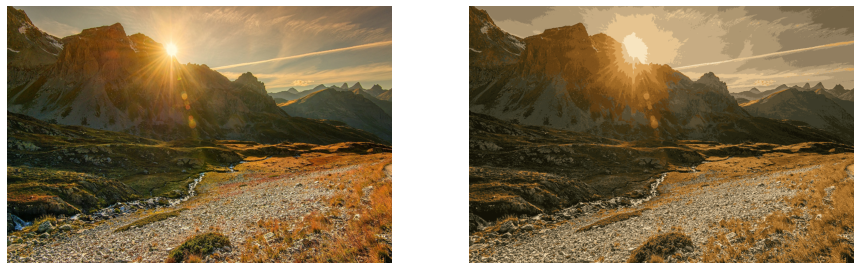

In [38]:
comparacio_imatges([img_world, colors_im_world])

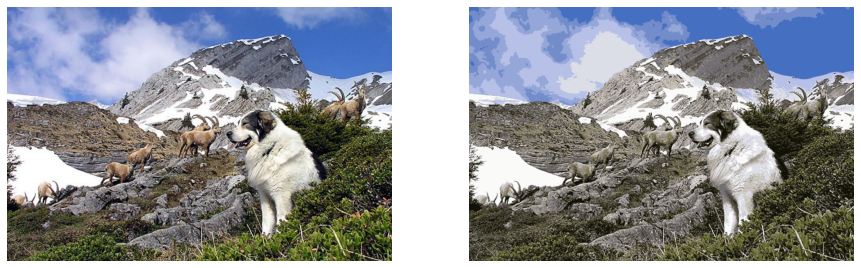

In [39]:
comparacio_imatges([img_dog, colors_im_dog])

4. Realitzeu el clustering de colors aplicant **GMM**. Mostreu la distribució de colors ara amb els clusters de GMM. Quines diferencies hi veieu respecte als clusters obtinguts amb k-Means?

In [42]:
img_world_gmm = llegir_imatge("paisaje.jpg")

clusters_world_gmm, labels_world_gmm = processa_imatge(img_world_gmm, "GMM")
colors_world_gmm = recrear_colors(clusters_world_gmm, labels_world_gmm)
colors_img_world_gmm = recrear_image(clusters_world_gmm, labels_world_gmm, img_world_gmm.shape)

(853, 1280, 3)
Fitting model GMM on a small sub-sample of the data
done in 95.564s.


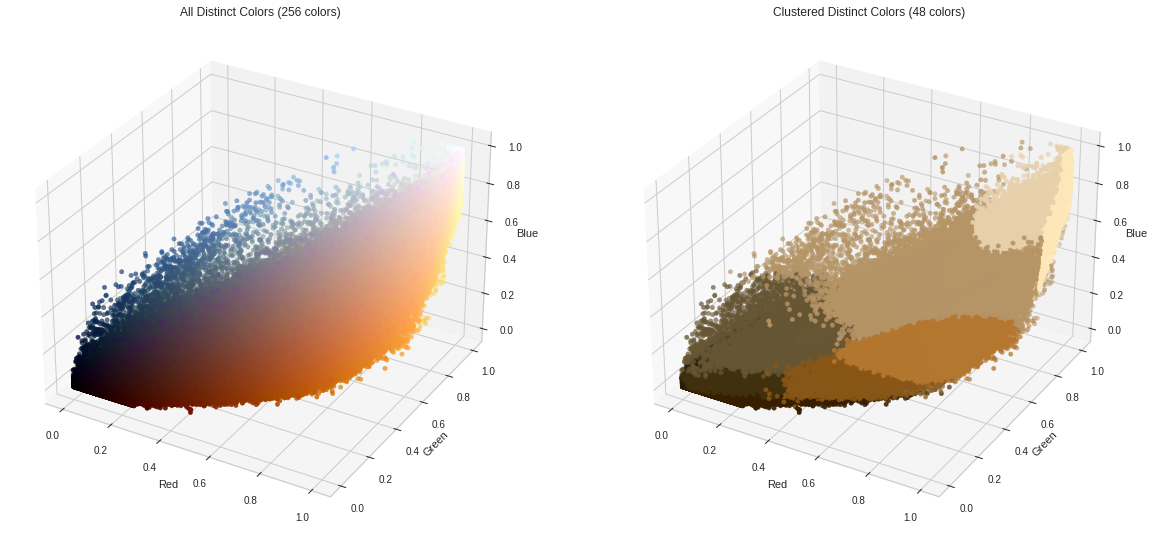

In [43]:
mostra_distribucio_colors(img_world_gmm, colors_world_gmm)

In [40]:
im_dog_gmm = llegir_imatge("dog.jpg")

clusters_dog_gmm, labels_dog_gmm = processa_imatge(im_dog_gmm, "GMM") #matriu 2d amb els valors de color de cada pixel
colors_dog_gmm = recrear_colors(clusters_dog_gmm, labels_dog_gmm) #matriu 2d amb els valors de color de cada pixel per mostrar-lo
colors_im_dog_gmm = recrear_image(clusters_dog_gmm, labels_dog_gmm, im_dog_gmm.shape)

(554, 840, 3)
Fitting model GMM on a small sub-sample of the data
done in 28.678s.


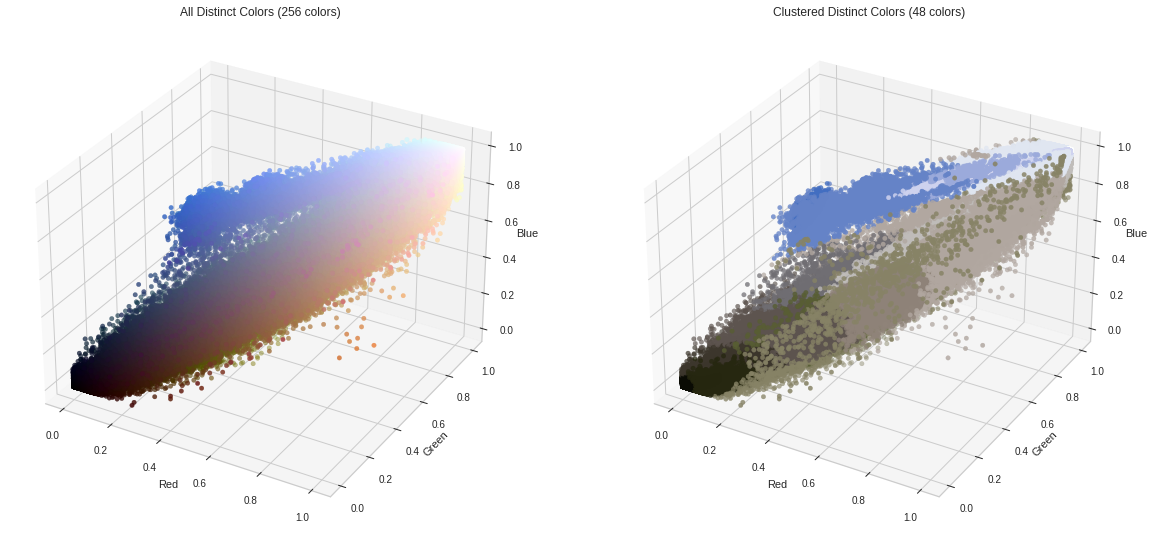

In [41]:
mostra_distribucio_colors(im_dog_gmm, colors_dog_gmm)

Veiem que la distribució de colors en el K-means és més esfèrica mentre que la distribució de colors en el GMM s'aproxima més a una forma més ovalada (com una pilota de rugby).

5. Mostra les imatges resultants (original, kmeans i gmm).

L'avaluació d'imatges és molt subjectiva, així i tot, trobo que els resultats amb k-means es veuen millor que els de gmm.

Per la imatge del paisatge, veiem que k-means aconsegueix mantenir la il·lusió dels rajos de sol, mentre que amb el mètode gmm la imatge sembla 'estreta'.

Per la imatge on apareix el gos, passa el mateix, en aquest cas l'efecte es veu en els núvols i en el gos, on en gmm ambdues es veuen pixelats, com si cada píxel tens menys relació amb els seus veïns, mentre que amb k-means és la imatge més suavitzada i la diferència entre regions de colors (blau-cel, blanc-núvols) està més suavitzada.

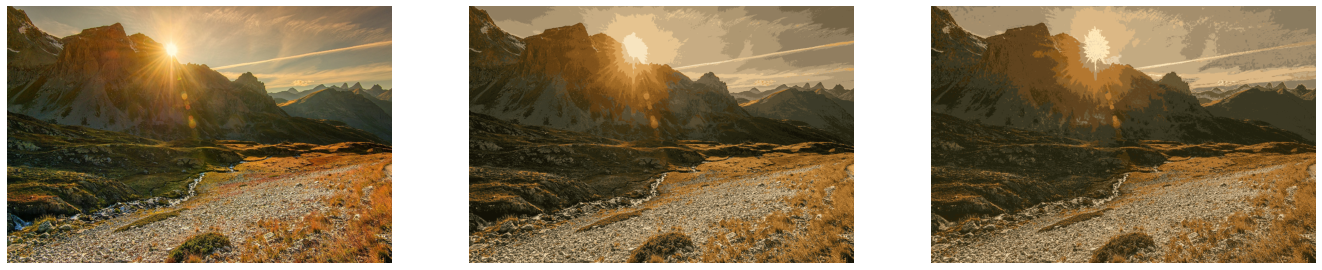

In [44]:
comparacio_imatges([img_world, colors_im_world, colors_img_world_gmm])

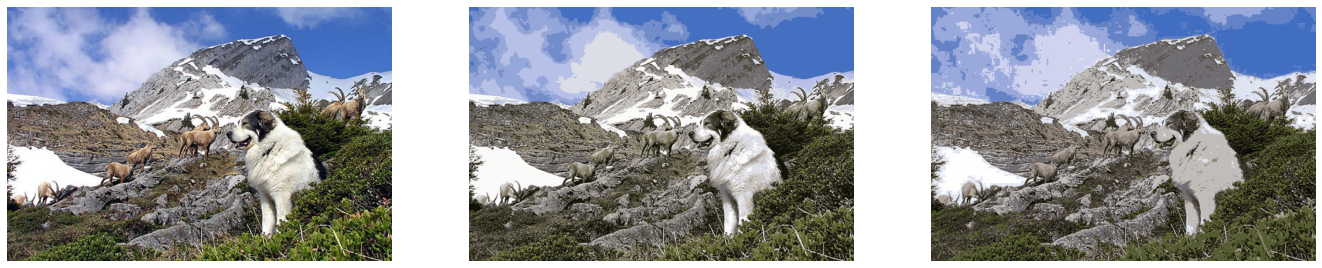

In [45]:
comparacio_imatges([img_dog, colors_im_dog, colors_im_dog_gmm])